In [71]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

import matplotlib.pyplot as plt
import numpy as np
# Define transformations and dataset path
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

dataset = ImageFolder(root='specs/train', transform=transform)

# Inspect class names
classes = dataset.classes
print(dataset.classes)


['Aluminum', 'Brass', 'Bronze']


In [47]:
dataset[0][1]

0

In [98]:
# train_size = int(0.8 * len(dataset))
# test_size = int((len(dataset) - train_size)/2)
# val_size = int((len(dataset) - (train_size))/2)

train_size = 76
test_size = 20
train_dataset, test_dataset= random_split(dataset, [train_size, test_size])

print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')


Train dataset size: 76
Test dataset size: 20


In [99]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [100]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [101]:

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape)
        # x = x.view(-1, 64 * 32 * 32)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [102]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # Adjusted based on the correct dimensions
        self.fc2 = nn.Linear(128, num_classes)
        # Softmax activation
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Convolutional layers with ReLU activation and max pooling
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        # Flatten the input for fully connected layers
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        # Fully connected layers with ReLU activation
        x = torch.relu(self.fc1(x))
        # Output layer with softmax activation
        x = self.softmax(self.fc2(x))
        return x

In [103]:

# Initialize the model
num_classes = len(dataset.classes)
model = SimpleCNN(num_classes=num_classes)

# Print model summary
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


In [104]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}')

    # Evaluate on the test set
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy on the test set: {(correct / total) * 100}%')



Epoch [1/100], Loss: 1.2072138388951619
Accuracy on the test set: 25.0%
Epoch [2/100], Loss: 1.187689741452535
Accuracy on the test set: 35.0%
Epoch [3/100], Loss: 1.155598521232605
Accuracy on the test set: 20.0%
Epoch [4/100], Loss: 1.0314313570658367
Accuracy on the test set: 35.0%
Epoch [5/100], Loss: 0.9881248474121094
Accuracy on the test set: 40.0%
Epoch [6/100], Loss: 0.9159337878227234
Accuracy on the test set: 30.0%
Epoch [7/100], Loss: 0.9698948860168457
Accuracy on the test set: 30.0%
Epoch [8/100], Loss: 0.9085581501324972
Accuracy on the test set: 40.0%
Epoch [9/100], Loss: 0.9084115227063497
Accuracy on the test set: 40.0%
Epoch [10/100], Loss: 0.8603497346242269
Accuracy on the test set: 35.0%
Epoch [11/100], Loss: 0.8552131851514181
Accuracy on the test set: 40.0%
Epoch [12/100], Loss: 0.8465422789255778
Accuracy on the test set: 45.0%
Epoch [13/100], Loss: 0.8796653747558594
Accuracy on the test set: 40.0%
Epoch [14/100], Loss: 0.8541438182195028
Accuracy on the test 

In [105]:
# Assume 'model' is your trained PyTorch model

# Specify a file path to save the model
model_path = 'trained_model.pth'

# Save the model and its state dictionary
torch.save({
    'model_state_dict': model.state_dict(),
    # If needed, you can also save the optimizer's state
    # 'optimizer_state_dict': optimizer.state_dict(),
}, model_path)

print(f"Model saved to {model_path}")


Model saved to trained_model.pth


In [ ]:
# Assume you want to load the model from 'trained_model.pth'

# Define the model architecture (must match the original model)
model = SimpleCNN(num_classes=3)  # Example: SimpleCNN with 3 classes

# Load the saved model checkpoint
checkpoint = torch.load('trained_model.pth')

# Load the state dictionary into the model
model.load_state_dict(checkpoint['model_state_dict'])

# If you saved optimizer state and want to resume training, you can also load the optimizer state
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Set the model to evaluation mode (if you're only doing inference)
model.eval()

print("Model loaded successfully.")


In [106]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


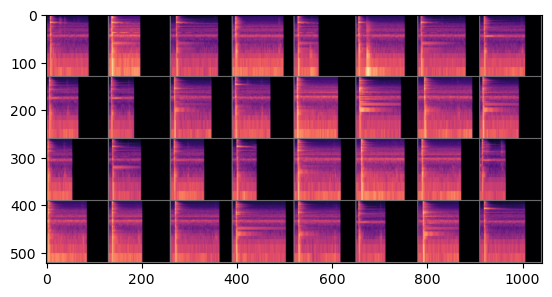

Brass Brass Brass Aluminum Brass Brass Brass Aluminum Aluminum Aluminum Bronze Brass Bronze Bronze Bronze Bronze Aluminum Brass Aluminum Brass Bronze Bronze Bronze Aluminum Bronze Bronze Bronze Bronze Bronze Aluminum Bronze Brass


In [64]:

# get random training images with iter function
dataiter = iter(train_loader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

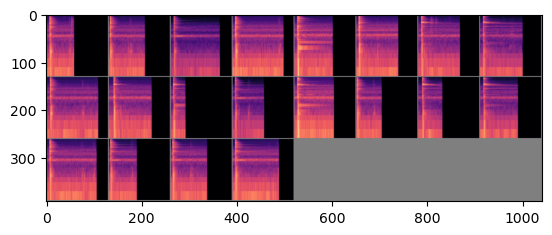

GroundTruth:  Aluminum Aluminum Aluminum Aluminum


In [137]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))

In [138]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Aluminum Aluminum Aluminum Bronze


In [159]:
# Assuming 'outputs' are the raw outputs from your model and 'labels' are the ground truth labels
# You may need to apply softmax to get probabilities
probabilities = torch.softmax(outputs, dim=1).detach().numpy()  # Convert probabilities to NumPy array
ground_truth = labels.numpy()  # Convert ground truth labels to NumPy array


In [162]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
embeddings = tsne.fit_transform(probabilities)


/tmp/ipykernel_48044/2467228037.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


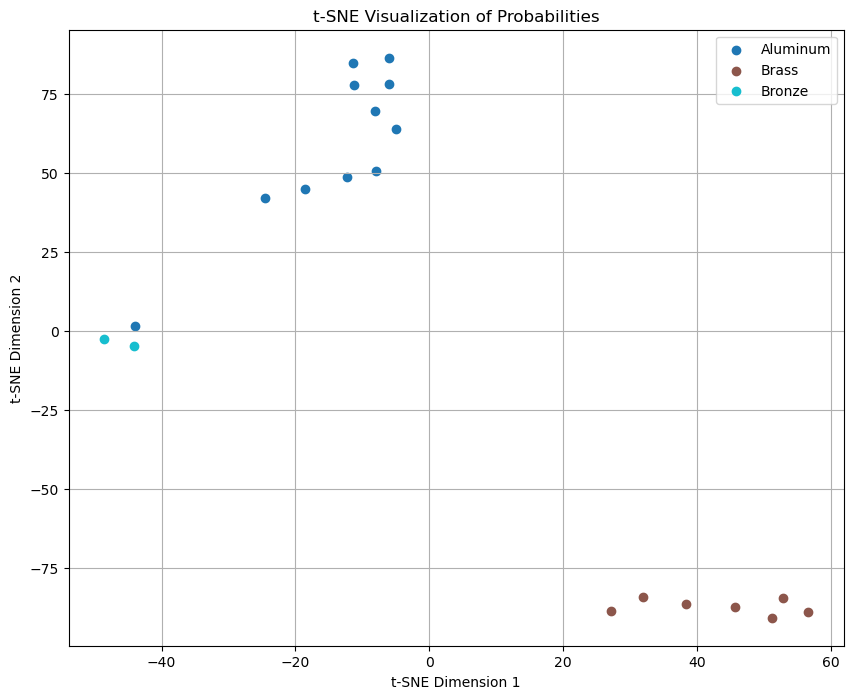

In [163]:
import matplotlib.pyplot as plt

# Define a colormap for classes (adjust according to your number of classes)
num_classes = len(classes)
colors = plt.cm.get_cmap('tab10', num_classes)

# Plot each class separately
plt.figure(figsize=(10, 8))
for class_idx in range(num_classes):
    plt.scatter(embeddings[ground_truth == class_idx, 0], 
                embeddings[ground_truth == class_idx, 1], 
                color=colors(class_idx),
                label=classes[class_idx])

plt.title('t-SNE Visualization of Probabilities')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


In [175]:
for i in enumerate(test_dataset):
    print(i[1][1])

0
0
0
0
2
2
1
1
0
1
1
0
1
0
1
1
0
0
0
0
